In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [11]:
# create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=90,  # randomly rotate images by 10 degrees
    width_shift_range=0.1,  # randomly shift images horizontally by 10%
    height_shift_range=0.1,  # randomly shift images vertically by 10%
    zoom_range=0.1,  # randomly zoom images by up to 10%
    fill_mode='nearest',  # fill in missing pixels with nearest value
    )

# generate augmented images from MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape images to (samples, height, width, channels) format
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)
# fit the ImageDataGenerator to the training data
datagen.fit(X_train)

X_train = datagen.flow(X_train, batch_size=60000,shuffle=False).next().reshape(X_train.shape[0], 28, 28,)


(60000, 28, 28, 1)


In [12]:
print(X_train.shape, train_X.shape)

(60000, 28, 28) (60000, 28, 28)


<Figure size 432x288 with 0 Axes>

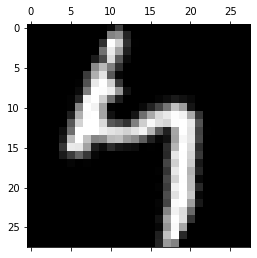

<Figure size 432x288 with 0 Axes>

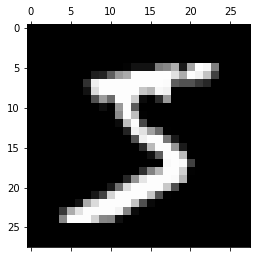

In [5]:
X_train.shape
i = 0
# augmented data
plt.gray()
plt.matshow(X_train[i])
plt.show()

# default data
plt.gray()
plt.matshow(train_X[i])
plt.show()

In [14]:
np.append(train_X, X_train, axis = 0).shape

(120000, 28, 28)